In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [18]:


df= pd.read_csv("titanic_train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
features = ['Pclass', 'Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [23]:
df=df[features]

In [27]:
df.head()

,Pclass,Survived,Sex,SibSp,Parch,Embarked
0,3,0,male,1,0,S
1,1,1,female,1,0,C
2,3,1,female,0,0,S
3,1,1,female,1,0,S
4,3,0,male,0,0,S


In [75]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [76]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((623, 5), (268, 5))

In [77]:
### How to create contingency Table
###shown for 'Sex' with 'Survived'

In [78]:
cont_table=pd.crosstab(y_train,X_train['Sex'])
cont_table

Sex,female,male
Survived,,
0,53,328
1,162,80


In [79]:
chi2_contingency(cont_table)
###returns the following
# chi2 : float
#     The test statistic.
# p : float
#     The p-value of the test
# dof : int
#     Degrees of freedom
# expected : ndarray, same shape as `observed`
#     The expected frequencies, based on the marginal sums of the table.

(181.82121569538316,
 1.9399290790723904e-41,
 1,
 array([[131.4847512, 249.5152488],
        [ 83.5152488, 158.4847512]]))

In [80]:
#### calculate the p-value of each feature 
##Build contingency table for each feature with the target variable 'Survived'
###make a list of all the p-values of the features

In [81]:
p_value_lst=[]
for i in X_train.columns:
    cont_tbl=pd.crosstab(y_train,X_train[i])
    p_value=chi2_contingency(cont_tbl)[1]
    p_value_lst.append(p_value)


In [82]:
p_value_lst

[3.37152494996193e-16,
 1.9399290790723904e-41,
 2.0361074588515947e-05,
 0.03219908562697061,
 9.379245609932098e-05]

In [83]:
# Putting the p_values along with their features into a dataframe

In [84]:
df_p_value=pd.DataFrame(X_train.columns,p_value_lst)

In [85]:
# df_p_value.columns=['features','p-values']
df_p_value.reset_index(inplace=True)

In [86]:
df_p_value.columns=['p_value','features']
df_p_value

,p_value,features
0,3.371525e-16,Pclass
1,1.939929e-41,Sex
2,2.036107e-05,SibSp
3,3.219909e-02,Parch
4,9.379246e-05,Embarked


In [87]:
df_p_value=df_p_value[['features','p_value']]

In [88]:
##Here is the table of features along with p_values
df_p_value

,features,p_value
0,Pclass,3.371525e-16
1,Sex,1.939929e-41
2,SibSp,2.036107e-05
3,Parch,3.219909e-02
4,Embarked,9.379246e-05


In [89]:
##sorting the features based on their p_values in ascending order

In [90]:
df_p_value.sort_values('p_value',ascending=True,inplace=True)

In [91]:
df_p_value.set_index('features',inplace=True)

In [94]:
###Features sorted based on their p_values
df_p_value

,p_value
features,
Sex,1.939929e-41
Pclass,3.371525e-16
SibSp,2.036107e-05
Embarked,9.379246e-05
Parch,3.219909e-02


Text(0.5, 1.0, 'Feature importance based on chi-square test')

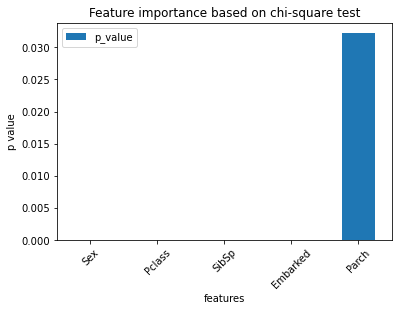

In [95]:
df_p_value.sort_values('p_value',ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [97]:
# Lesser the p value higher the importance of the feature.
# So if we have to choose best 3 features those would be 'Sex','Pclass','SibSp'